In [157]:
import geopandas as gpd
import pandas as pd

In [158]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/BATISTINI EIXOS VIA.dxf', encoding='ANSI_1252')

In [159]:
bairro = 'BATISTINI'

In [160]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [161]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [162]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,RUA CAPIVARI - 30_12_20 - etapa 03 - DJI_0141,None,AcDbEntity:AcDbPolyline,ByLayer,BB,None,"LINESTRING (336580.445 7369985.053, 336519.633..."
1,ESTRADA GALVÃO - 30_12_20 - etapa 01 - DJI_0028,None,AcDbEntity:AcDbPolyline,ByLayer,BC,None,"LINESTRING (339486.973 7372027.563, 339482.207..."
2,ESTRADA MARCO POLO - 30_12_20 - etapa 01 - DJI...,None,AcDbEntity:AcDbPolyline,ByLayer,BD,None,"LINESTRING (340005.914 7372528.368, 339953.624..."
3,RUA FRANCISCO AFONSO RIGUEIRA - 30_12_20 - eta...,None,AcDbEntity:AcDbPolyline,ByLayer,BE,None,"LINESTRING (338731.441 7370094.119, 338726.218..."
4,MARIA ENCARNAÃÃO NUTE - 30_12_20 - etapa 04 ...,None,AcDbEntity:AcDbPolyline,ByLayer,BF,None,"LINESTRING (338997.586 7370212.243, 338986.481..."
...,...,...,...,...,...,...,...
119,RUA DAS AROEIRAS - 30_12_20 - etapa 04 - DJI_0...,None,AcDbEntity:AcDbPolyline,ByLayer,132,None,"LINESTRING (338777.515 7370175.048, 338783.404..."
120,RUA GINÃS GONSALES - 30_12_20 - etapa 04 - D...,None,AcDbEntity:AcDbPolyline,ByLayer,133,None,"LINESTRING (338935.386 7370180.089, 338928.159..."
121,RUA LUIGI BATISTINI - 30_12_20 - etapa 01 - DJ...,None,AcDbEntity:AcDbPolyline,ByLayer,134,None,"LINESTRING (338667.780 7372633.849, 339258.962..."
122,RUA ASSUMPTA SABATINI ROSSI - 30_12_20 - etapa...,None,AcDbEntity:AcDbPolyline,ByLayer,135,None,"LINESTRING (339037.145 7372695.600, 339011.502..."


In [163]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [164]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

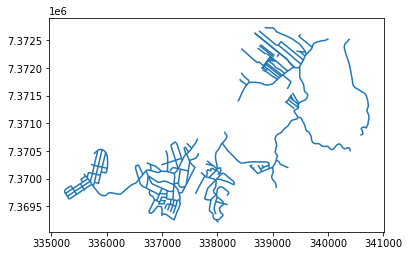

In [165]:
gdf_dxf.plot()

In [166]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('MCT - ', '')

In [167]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [168]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [169]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('DJI_[0-9]{4}')

In [170]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [171]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [172]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [173]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer']

6                                   RUA PARAÍBA
15                              RUA NOVA YORQUE
21             AVENIDA VENÂNCIA TOMÁS DE AQUINO
37                                RUA BOA VISTA
43                                   RUA CANADÁ
49                                          ÚNA
51                                   RUA TIBAGI
110    MCT RUA PROF. BENEDITO CARLOS DOS SANTOS
116                            RUA JOÃO ANTUNES
118                          TV. DAS GOIABEIRAS
Name: Layer, dtype: object

In [174]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,RUA CAPIVARI -,30_12_20,None,- etapa 03 -,None,DJI_0141,,None,None,None,None,None,None
1,ESTRADA GALVÃO -,30_12_20,None,- etapa 01 -,None,DJI_0028,,None,None,None,None,None,None
2,ESTRADA MARCO POLO -,30_12_20,None,- etapa 01 -,None,DJI_0031,-,None,DJI_0032,-,None,DJI_0033,
3,RUA FRANCISCO AFONSO RIGUEIRA -,30_12_20,None,- etapa 04 -,None,DJI_0029,,None,None,None,None,None,None
4,MARIA ENCARNAÇÃO NUTE -,30_12_20,None,- etapa 04 -,None,DJI_0032,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,RUA DAS AROEIRAS -,30_12_20,None,- etapa 04 -,None,DJI_0031,-,None,DJI_0032,-,None,DJI_0033,
120,RUA GINÉS GONSALES -,30_12_20,None,- etapa 04 -,None,DJI_0027,,None,None,None,None,None,None
121,RUA LUIGI BATISTINI -,30_12_20,None,- etapa 01 -,None,DJI_0027,,None,None,None,None,None,None
122,RUA ASSUMPTA SABATINI ROSSI -,30_12_20,None,- etapa 01 -,None,DJI_0024,,None,None,None,None,None,None


In [175]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].unique()

array([' - etapa 03 - ', ' - etapa 01  - ', ' - etapa 01 - ',
       ' - etapa 04 - ', ' - MAVIC - ', None, ' - etapa 02 - ',
       ' - etapa 03 -  ', '  - etapa 02 - ', ' - ', '  - etapa 04 - '],
      dtype=object)

In [176]:
etapas = {
    ' - etapa 03 - ':'etapa_03', 
    ' - etapa 01  - ':'etapa_01', 
    ' - etapa 01 - ':'etapa_01',
    ' - etapa 04 - ':'etapa_04', 
    ' - MAVIC - ':'mavic', 
    ' - etapa 02 - ':'etapa_02',
    ' - etapa 03 -  ':'etapa_03', 
    '  - etapa 02 - ':'etapa_02', 
    '  - etapa 04 - ':'etapa_04'
}

In [177]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

0      etapa_03
1      etapa_01
2      etapa_01
3      etapa_04
4      etapa_04
         ...   
119    etapa_04
120    etapa_04
121    etapa_01
122    etapa_01
123    etapa_01
Name: 3, Length: 124, dtype: object

In [178]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

In [179]:
gdf_dxf.loc[:, 'etapa']

0      etapa_03
1      etapa_01
2      etapa_01
3      etapa_04
4      etapa_04
         ...   
119    etapa_04
120    etapa_04
121    etapa_01
122    etapa_01
123    etapa_01
Name: etapa, Length: 124, dtype: object

In [180]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA CAPIVARI - 30_12_20 - etapa 03 - DJI_0141,None,AcDbEntity:AcDbPolyline,ByLayer,BB,None,"LINESTRING (336580.445 7369985.053, 336519.633...","[RUA CAPIVARI, 30_12_20, etapa 03, DJI_0141]",[DJI_0141],30_12_20,RUA CAPIVARI,etapa_03
1,ESTRADA GALVÃO - 30_12_20 - etapa 01 - DJI_0028,None,AcDbEntity:AcDbPolyline,ByLayer,BC,None,"LINESTRING (339486.973 7372027.563, 339482.207...","[ESTRADA GALVÃO, 30_12_20, etapa 01 , DJI_0028]",[DJI_0028],30_12_20,ESTRADA GALVÃO,etapa_01
2,ESTRADA MARCO POLO - 30_12_20 - etapa 01 - DJI...,None,AcDbEntity:AcDbPolyline,ByLayer,BD,None,"LINESTRING (340005.914 7372528.368, 339953.624...","[ESTRADA MARCO POLO, 30_12_20, etapa 01, DJI_0...","[DJI_0031, DJI_0032, DJI_0033]",30_12_20,ESTRADA MARCO POLO,etapa_01
3,RUA FRANCISCO AFONSO RIGUEIRA - 30_12_20 - eta...,None,AcDbEntity:AcDbPolyline,ByLayer,BE,None,"LINESTRING (338731.441 7370094.119, 338726.218...","[RUA FRANCISCO AFONSO RIGUEIRA, 30_12_20, etap...",[DJI_0029],30_12_20,RUA FRANCISCO AFONSO RIGUEIRA,etapa_04
4,MARIA ENCARNAÇÃO NUTE - 30_12_20 - etapa 04 - ...,None,AcDbEntity:AcDbPolyline,ByLayer,BF,None,"LINESTRING (338997.586 7370212.243, 338986.481...","[MARIA ENCARNAÇÃO NUTE, 30_12_20, etapa 04, DJ...",[DJI_0032],30_12_20,MARIA ENCARNAÇÃO NUTE,etapa_04
...,...,...,...,...,...,...,...,...,...,...,...,...
119,RUA DAS AROEIRAS - 30_12_20 - etapa 04 - DJI_0...,None,AcDbEntity:AcDbPolyline,ByLayer,132,None,"LINESTRING (338777.515 7370175.048, 338783.404...","[RUA DAS AROEIRAS, 30_12_20, etapa 04, DJI_003...","[DJI_0031, DJI_0032, DJI_0033]",30_12_20,RUA DAS AROEIRAS,etapa_04
120,RUA GINÉS GONSALES - 30_12_20 - etapa 04 - DJ...,None,AcDbEntity:AcDbPolyline,ByLayer,133,None,"LINESTRING (338935.386 7370180.089, 338928.159...","[RUA GINÉS GONSALES, 30_12_20 , etapa 04, DJI_...",[DJI_0027],30_12_20,RUA GINÉS GONSALES,etapa_04
121,RUA LUIGI BATISTINI - 30_12_20 - etapa 01 - DJ...,None,AcDbEntity:AcDbPolyline,ByLayer,134,None,"LINESTRING (338667.780 7372633.849, 339258.962...","[RUA LUIGI BATISTINI, 30_12_20, etapa 01, DJI_...",[DJI_0027],30_12_20,RUA LUIGI BATISTINI,etapa_01
122,RUA ASSUMPTA SABATINI ROSSI - 30_12_20 - etapa...,None,AcDbEntity:AcDbPolyline,ByLayer,135,None,"LINESTRING (339037.145 7372695.600, 339011.502...","[RUA ASSUMPTA SABATINI ROSSI, 30_12_20, etapa ...",[DJI_0024],30_12_20,RUA ASSUMPTA SABATINI ROSSI,etapa_01


In [181]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [182]:
pd_videos

,Video_0,Video_1,Video_2
0,DJI_0141.MOV,None,None
1,DJI_0028.MOV,None,None
2,DJI_0031.MOV,DJI_0032.MOV,DJI_0033.MOV
3,DJI_0029.MOV,None,None
4,DJI_0032.MOV,None,None
...,...,...,...
119,DJI_0031.MOV,DJI_0032.MOV,DJI_0033.MOV
120,DJI_0027.MOV,None,None
121,DJI_0027.MOV,None,None
122,DJI_0024.MOV,None,None


In [183]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [184]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1', 'Video_2'],
      dtype='object')

In [185]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [186]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [187]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [188]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [189]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.etapa + gdf_dxf[c]

In [190]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [191]:
gdf_dxf.crs = 'epsg:31983'

In [192]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_2,Video_0_path,Video_1_path,Video_2_path
0,AVENIDA VENÂNCIA TOMÁS DE AQUINO,"LINESTRING (338448.560 7370280.386, 338432.575...",None,AcDbEntity:AcDbPolyline,ByLayer,D0,None,[AVENIDA VENÂNCIA TOMÁS DE AQUINO],[],NaN,AVENIDA VENÂNCIA TOMÁS DE AQUINO,,None,None,None,NaN,NaN,NaN
1,AVENIDA VITOR BRECHERET - 30_12_20 - etapa 02 ...,"LINESTRING (337290.654 7370180.316, 337474.650...",None,AcDbEntity:AcDbPolyline,ByLayer,C3,None,"[AVENIDA VITOR BRECHERET, 30_12_20, etapa 02, ...",[DJI_0023],30_12_20/,AVENIDA VITOR BRECHERET,etapa_02/,DJI_0023.MOV,None,None,videos/batistini/etapa_02/DJI_0023.MOV,NaN,NaN
2,AVENIDA ÂNGEKO DEMACHI - 30_12_20 - etapa 01 -...,"LINESTRING (340581.836 7370794.687, 340602.486...",None,AcDbEntity:AcDbPolyline,ByLayer,119,None,"[AVENIDA ÂNGEKO DEMACHI, 30_12_20, etapa 01, D...",[DJI_0004],30_12_20/,AVENIDA ÂNGEKO DEMACHI,etapa_01/,DJI_0004.MOV,None,None,videos/batistini/etapa_01/DJI_0004.MOV,NaN,NaN
3,ESTRADA ARTHUR MARSON - 30_12_20 - etapa 01 - ...,"LINESTRING (338888.677 7372088.845, 338932.910...",None,AcDbEntity:AcDbPolyline,ByLayer,126,None,"[ESTRADA ARTHUR MARSON, 30_12_20, etapa 01, DJ...",[DJI_0007],30_12_20/,ESTRADA ARTHUR MARSON,etapa_01/,DJI_0007.MOV,None,None,videos/batistini/etapa_01/DJI_0007.MOV,NaN,NaN
4,ESTRADA GALVÃO - 30_12_20 - etapa 01 - DJI_0028,"MULTILINESTRING ((339486.973 7372027.563, 3394...",None,AcDbEntity:AcDbPolyline,ByLayer,BC,None,"[ESTRADA GALVÃO, 30_12_20, etapa 01 , DJI_0028]",[DJI_0028],30_12_20/,ESTRADA GALVÃO,etapa_01/,DJI_0028.MOV,None,None,videos/batistini/etapa_01/DJI_0028.MOV,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,RUA ÁGUAS DE SANTA CLARA - 30_12_20 - etapa 01...,"LINESTRING (339016.597 7372199.634, 338996.906...",None,AcDbEntity:AcDbPolyline,ByLayer,11E,None,"[RUA ÁGUAS DE SANTA CLARA, 30_12_20, etapa 01,...",[DJI_0011],30_12_20/,RUA ÁGUAS DE SANTA CLARA,etapa_01/,DJI_0011.MOV,None,None,videos/batistini/etapa_01/DJI_0011.MOV,NaN,NaN
106,RUA ÚNA - 30_12_20 - etapa 03 - DJI_0113,"LINESTRING (337089.364 7369632.079, 337082.803...",None,AcDbEntity:AcDbPolyline,ByLayer,C9,None,"[RUA ÚNA, 30_12_20, etapa 03, DJI_0113]",[DJI_0113],30_12_20/,RUA ÚNA,etapa_03/,DJI_0113.MOV,None,None,videos/batistini/etapa_03/DJI_0113.MOV,NaN,NaN
107,TV SOSSEGO - 30_12_20 - etapa 01 - DJI_0030,"LINESTRING (338531.533 7371694.975, 338476.494...",None,AcDbEntity:AcDbPolyline,ByLayer,F7,None,"[TV SOSSEGO, 30_12_20, etapa 01, DJI_0030]",[DJI_0030],30_12_20/,TV SOSSEGO,etapa_01/,DJI_0030.MOV,None,None,videos/batistini/etapa_01/DJI_0030.MOV,NaN,NaN
108,TV. DAS GOIABEIRAS,"LINESTRING (338804.573 7370246.690, 338829.757...",None,AcDbEntity:AcDbPolyline,ByLayer,131,None,[TV. DAS GOIABEIRAS],[],NaN,TV. DAS GOIABEIRAS,,None,None,None,NaN,NaN,NaN


In [193]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_2,Video_0_path,Video_1_path,Video_2_path
0,"LINESTRING (338448.560 7370280.386, 338432.575...",NaN,AVENIDA VENÂNCIA TOMÁS DE AQUINO,,None,None,None,NaN,NaN,NaN
1,"LINESTRING (337290.654 7370180.316, 337474.650...",30_12_20/,AVENIDA VITOR BRECHERET,etapa_02/,DJI_0023.MOV,None,None,videos/batistini/etapa_02/DJI_0023.MOV,NaN,NaN
2,"LINESTRING (340581.836 7370794.687, 340602.486...",30_12_20/,AVENIDA ÂNGEKO DEMACHI,etapa_01/,DJI_0004.MOV,None,None,videos/batistini/etapa_01/DJI_0004.MOV,NaN,NaN
3,"LINESTRING (338888.677 7372088.845, 338932.910...",30_12_20/,ESTRADA ARTHUR MARSON,etapa_01/,DJI_0007.MOV,None,None,videos/batistini/etapa_01/DJI_0007.MOV,NaN,NaN
4,"MULTILINESTRING ((339486.973 7372027.563, 3394...",30_12_20/,ESTRADA GALVÃO,etapa_01/,DJI_0028.MOV,None,None,videos/batistini/etapa_01/DJI_0028.MOV,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
105,"LINESTRING (339016.597 7372199.634, 338996.906...",30_12_20/,RUA ÁGUAS DE SANTA CLARA,etapa_01/,DJI_0011.MOV,None,None,videos/batistini/etapa_01/DJI_0011.MOV,NaN,NaN
106,"LINESTRING (337089.364 7369632.079, 337082.803...",30_12_20/,RUA ÚNA,etapa_03/,DJI_0113.MOV,None,None,videos/batistini/etapa_03/DJI_0113.MOV,NaN,NaN
107,"LINESTRING (338531.533 7371694.975, 338476.494...",30_12_20/,TV SOSSEGO,etapa_01/,DJI_0030.MOV,None,None,videos/batistini/etapa_01/DJI_0030.MOV,NaN,NaN
108,"LINESTRING (338804.573 7370246.690, 338829.757...",NaN,TV. DAS GOIABEIRAS,,None,None,None,NaN,NaN,NaN


In [196]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'data_voo', 'Video_1', 'Video_0', 'Video_2', 'etapa'], axis=1)#.to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

,geometry,logradouro,Video_0_path,Video_1_path,Video_2_path
0,"LINESTRING (338448.560 7370280.386, 338432.575...",AVENIDA VENÂNCIA TOMÁS DE AQUINO,NaN,NaN,NaN
1,"LINESTRING (337290.654 7370180.316, 337474.650...",AVENIDA VITOR BRECHERET,videos/batistini/etapa_02/DJI_0023.MOV,NaN,NaN
2,"LINESTRING (340581.836 7370794.687, 340602.486...",AVENIDA ÂNGEKO DEMACHI,videos/batistini/etapa_01/DJI_0004.MOV,NaN,NaN
3,"LINESTRING (338888.677 7372088.845, 338932.910...",ESTRADA ARTHUR MARSON,videos/batistini/etapa_01/DJI_0007.MOV,NaN,NaN
4,"MULTILINESTRING ((339486.973 7372027.563, 3394...",ESTRADA GALVÃO,videos/batistini/etapa_01/DJI_0028.MOV,NaN,NaN
...,...,...,...,...,...
105,"LINESTRING (339016.597 7372199.634, 338996.906...",RUA ÁGUAS DE SANTA CLARA,videos/batistini/etapa_01/DJI_0011.MOV,NaN,NaN
106,"LINESTRING (337089.364 7369632.079, 337082.803...",RUA ÚNA,videos/batistini/etapa_03/DJI_0113.MOV,NaN,NaN
107,"LINESTRING (338531.533 7371694.975, 338476.494...",TV SOSSEGO,videos/batistini/etapa_01/DJI_0030.MOV,NaN,NaN
108,"LINESTRING (338804.573 7370246.690, 338829.757...",TV. DAS GOIABEIRAS,NaN,NaN,NaN


In [195]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_2           object
Video_0_path      object
Video_1_path      object
Video_2_path      object
dtype: object